This notebook aims to analyze the liveability of all the SA2s in the dataset. This takes into account the different factors that we determined to measure an SA2s liveability. Data from 2023 and 2024 was used to reflect more recent property locations and trends

We first analyze how we would give a score for each of the features (specifically distance metrics). We check first to see if they are normally distributed to perhaps give their overall quartile as the score for that SA2s feature score.

Original DataFrame shape: (120526, 26)
Shape after filtering for 2024 and 2023: (19756, 26)


/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


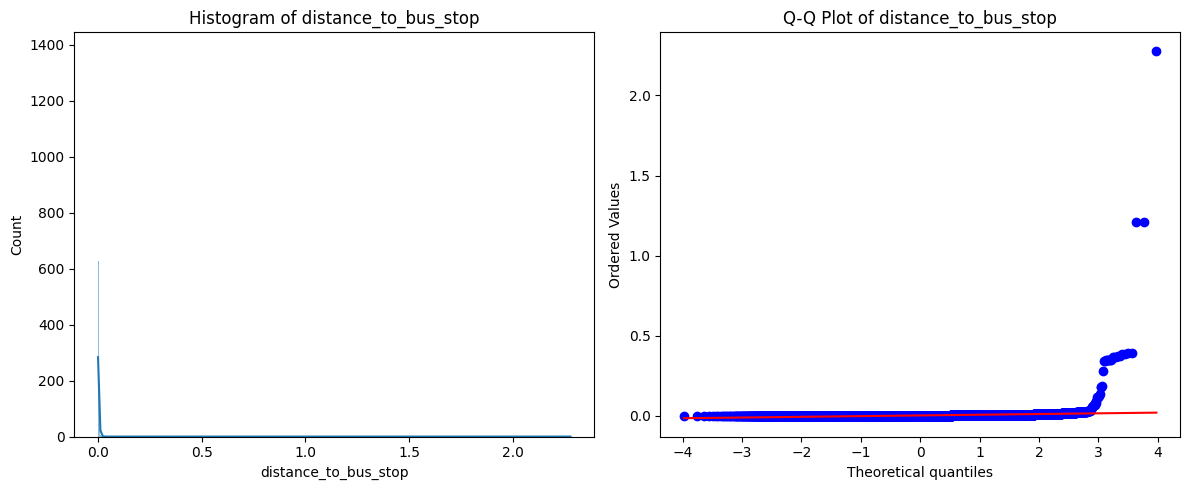

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


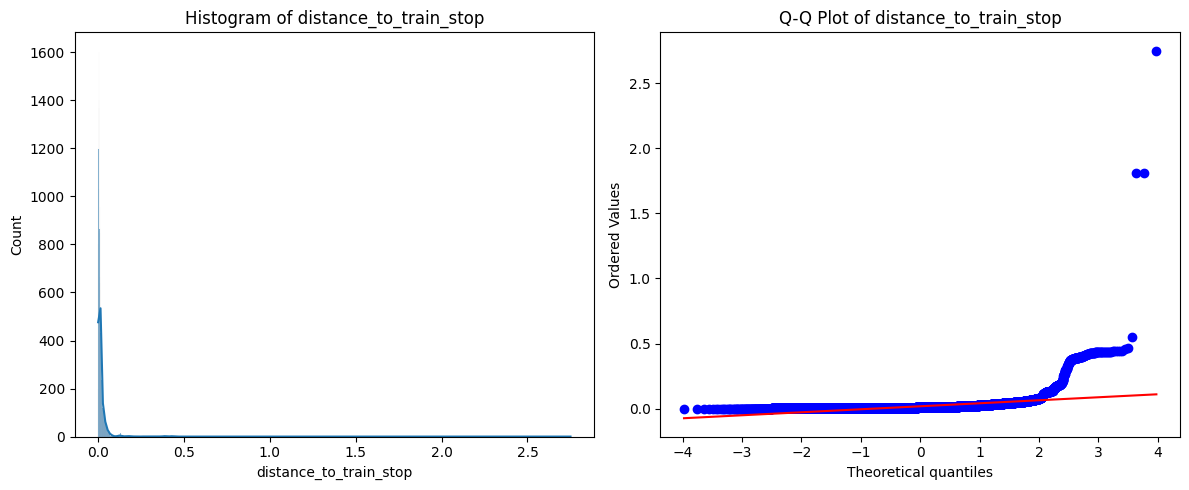

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


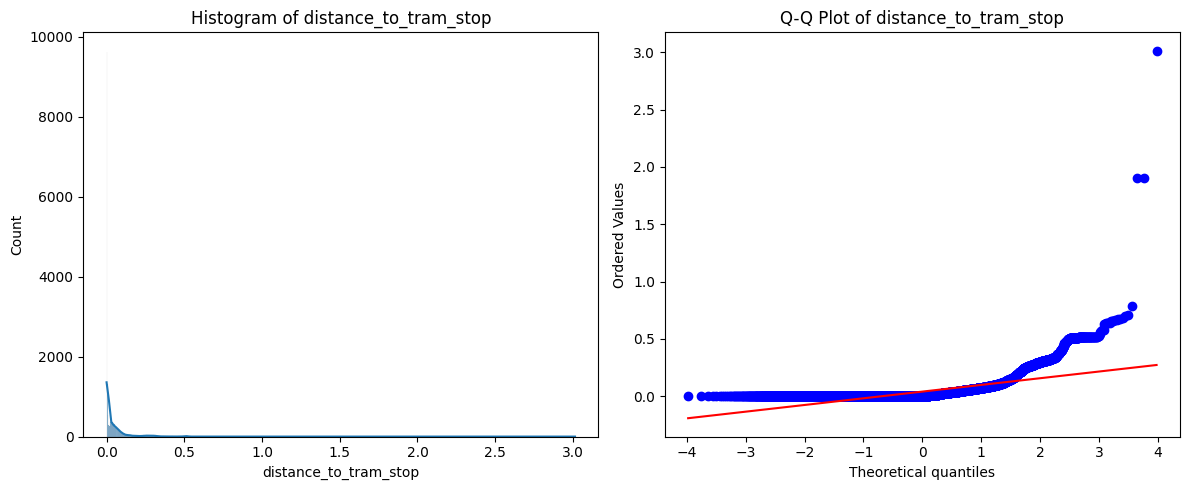

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


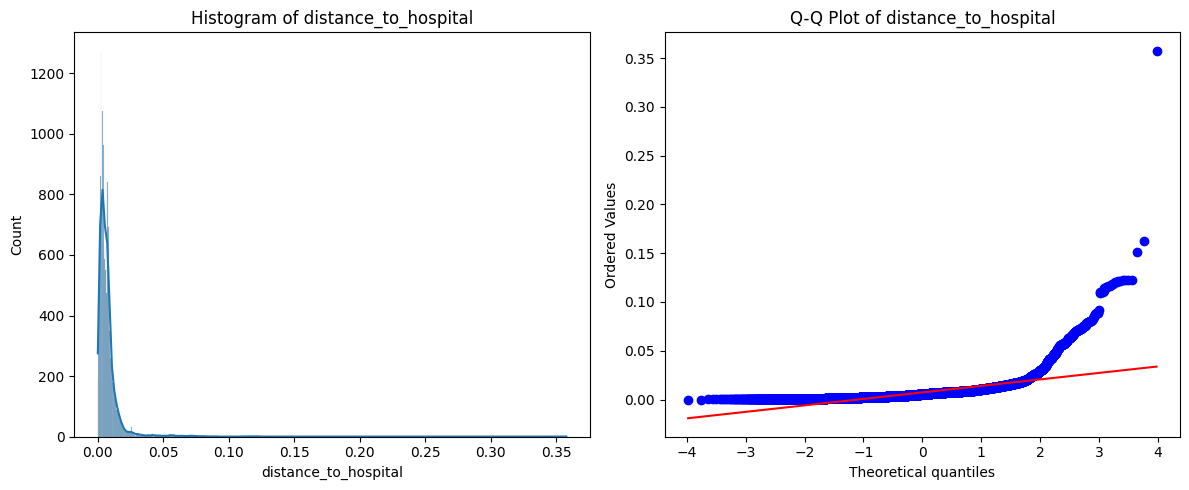

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


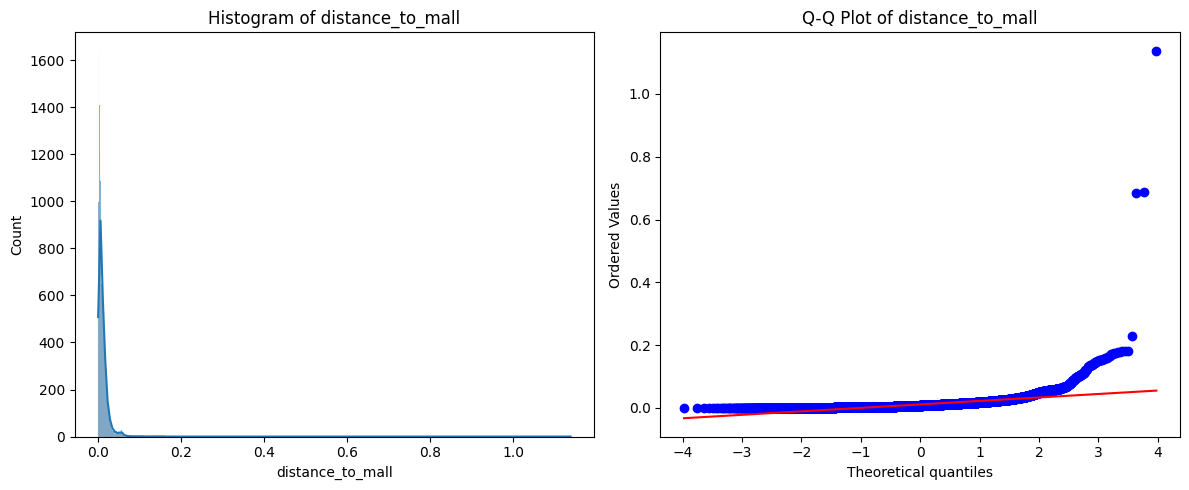

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


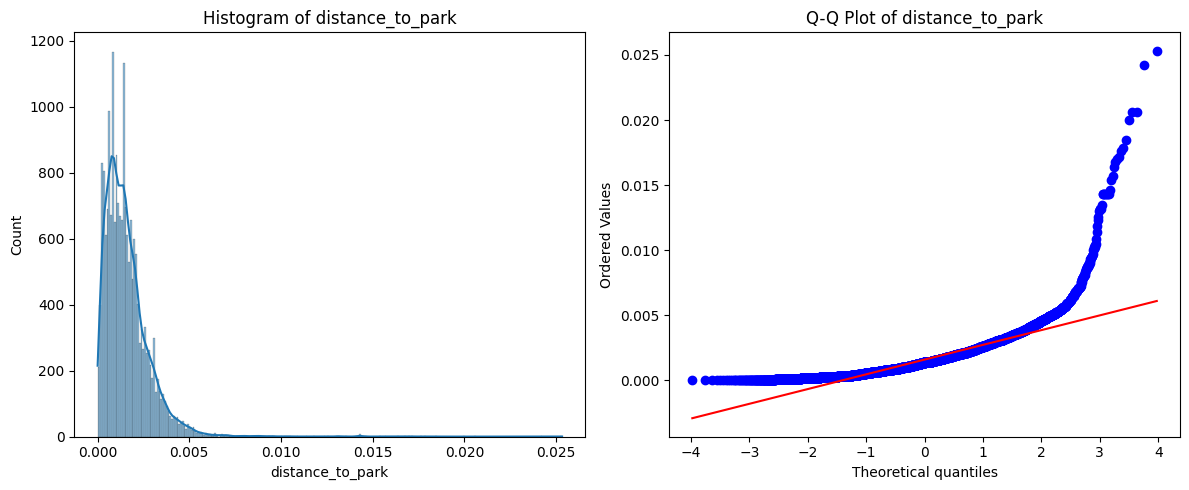

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


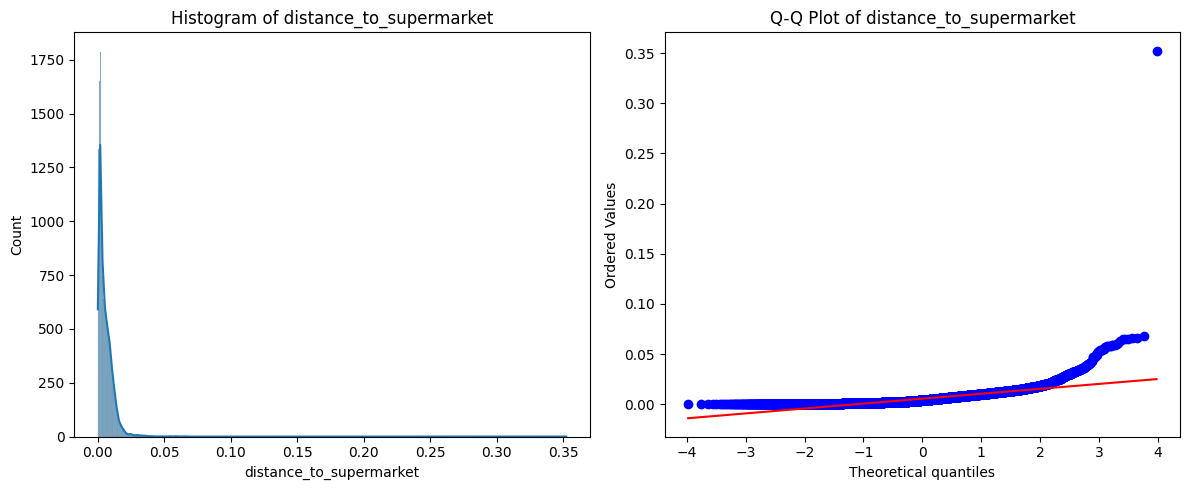

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


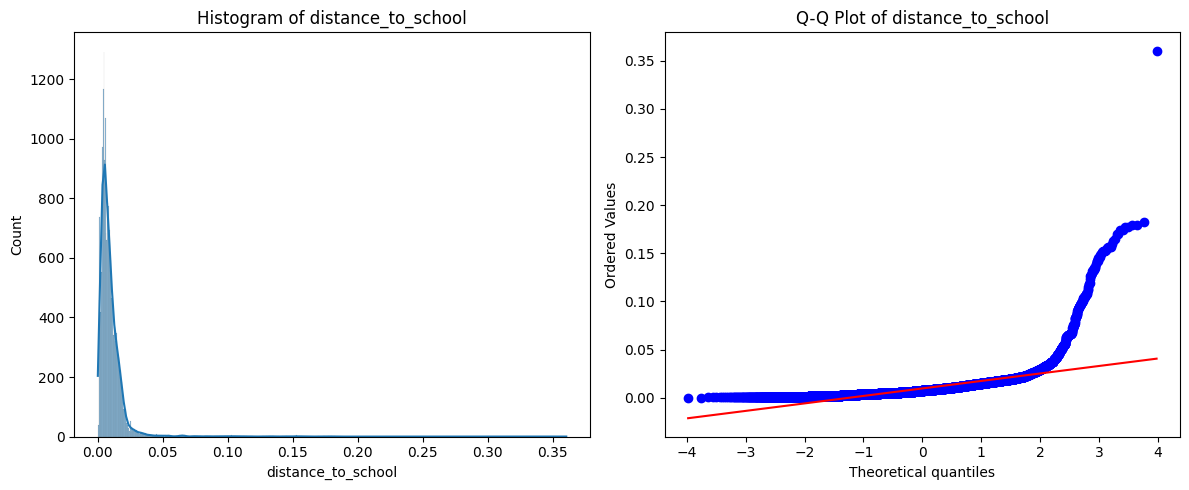

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


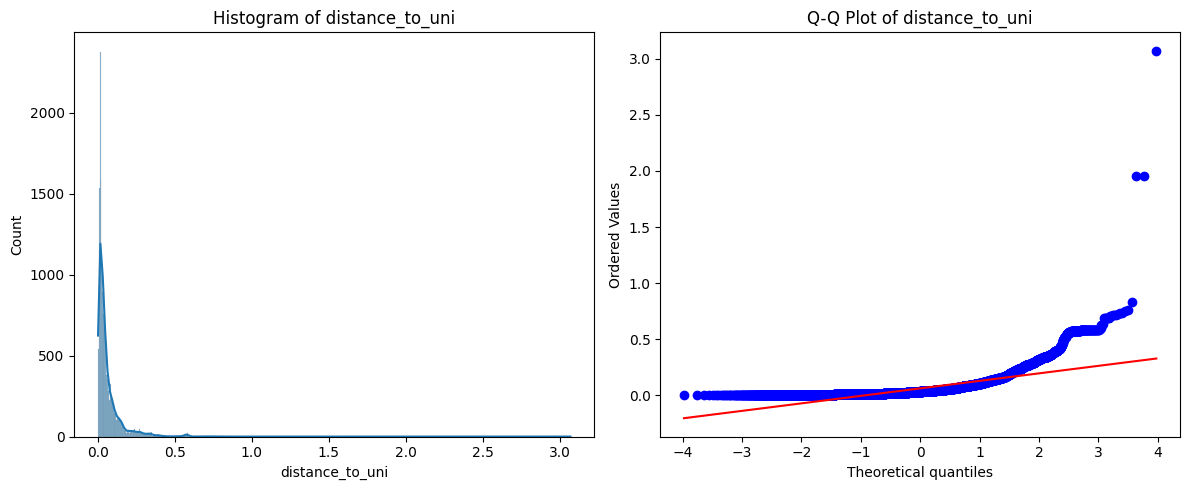

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


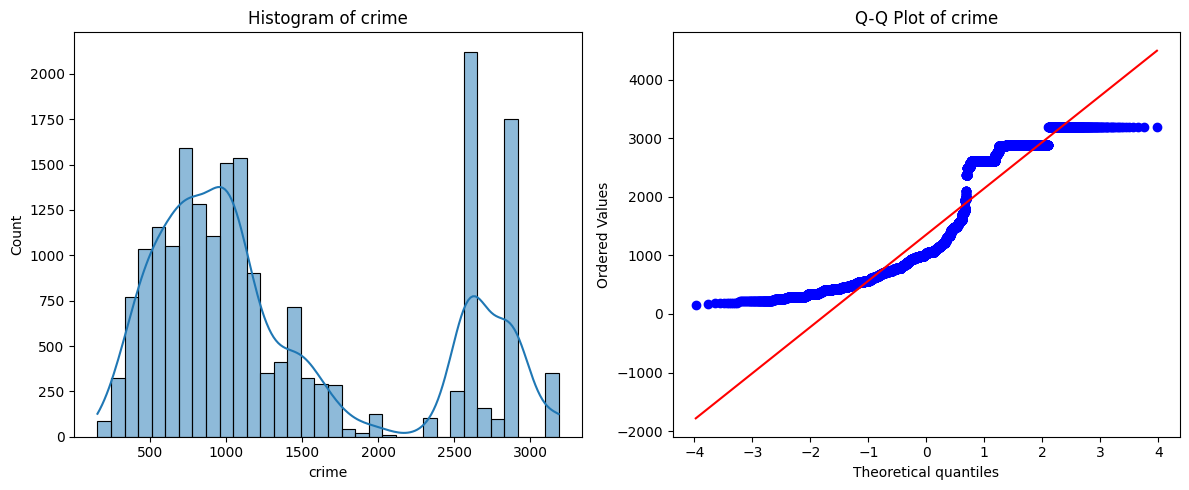


Normality Check Results:

+---+-------------------------+---------------------+-------------------------+---------------------+
|   |         Feature         |     W-statistic     |         p-value         | Normal Distribution |
+---+-------------------------+---------------------+-------------------------+---------------------+
| 0 |  distance_to_bus_stop   | 0.0355766511430845  | 2.0277031195744438e-134 |        False        |
| 1 | distance_to_train_stop  | 0.2466484354382522  | 2.6233454450261324e-127 |        False        |
| 2 |  distance_to_tram_stop  | 0.5022648813401154  | 8.166559132331397e-116  |        False        |
| 3 |  distance_to_hospital   | 0.49619556263347386 | 3.835131110066084e-116  |        False        |
| 4 |    distance_to_mall     | 0.42006981528502396 | 5.470246833148849e-120  |        False        |
| 5 |    distance_to_park     | 0.7827261292166898  | 1.7464591719918967e-94  |        False        |
| 6 | distance_to_supermarket | 0.6615220421763925  | 1

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

# Load your data
df = pd.read_parquet('../data/curated/model_data.parquet')
print("Original DataFrame shape:", df.shape)

# Filter for 2024 and 2023
df = df[(df['year'] == 2024) | (df['year'] == 2023)]
print("Shape after filtering for 2024 and 2023:", df.shape)

# Select features to analyze
features_to_check = [
    'distance_to_bus_stop', 'distance_to_train_stop', 'distance_to_tram_stop',
    'distance_to_hospital', 'distance_to_mall', 'distance_to_park',
    'distance_to_supermarket', 'distance_to_school', 'distance_to_uni', 'crime'
]

# Create a DataFrame for the means and std devs
normality_results = []

# Check normality for each feature
for col in features_to_check:
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(df[col].dropna())
    normality_results.append({
        'Feature': col,
        'W-statistic': stat,
        'p-value': p_value,
        'Normal Distribution': p_value > 0.05  # True if normal, False otherwise
    })
    
    # Plot histogram and Q-Q plot
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
normality_df = pd.DataFrame(normality_results)

# Print normality results
print("\nNormality Check Results:\n")
print(tabulate(normality_df, headers='keys', tablefmt='pretty', floatfmt=".4f"))

# If the distributions are normal enough, proceed with previous calculations
if all(normality_df['Normal Distribution']):
    # Calculate average distances and other statistics
    sa2_stats = df.groupby('SA2_CODE21').agg({
        'distance_to_bus_stop': 'mean',
        'distance_to_train_stop': 'mean',
        'distance_to_tram_stop': 'mean',
        'distance_to_hospital': 'mean',
        'distance_to_mall': 'mean',
        'distance_to_park': 'mean',
        'distance_to_supermarket': 'mean',
        'distance_to_school': 'mean',
        'distance_to_uni': 'mean',
        'crime': 'mean'
    }).reset_index()
    
    # (Continue with your original analysis...)
else:
    print("\nSome features do not follow a normal distribution. Consider using robust statistics or alternative scoring methods.")


We see that the features are not normally distributed so we try and perform a log transformation

Original DataFrame shape: (120526, 26)
Shape after filtering for 2024 and 2023: (19756, 26)


/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


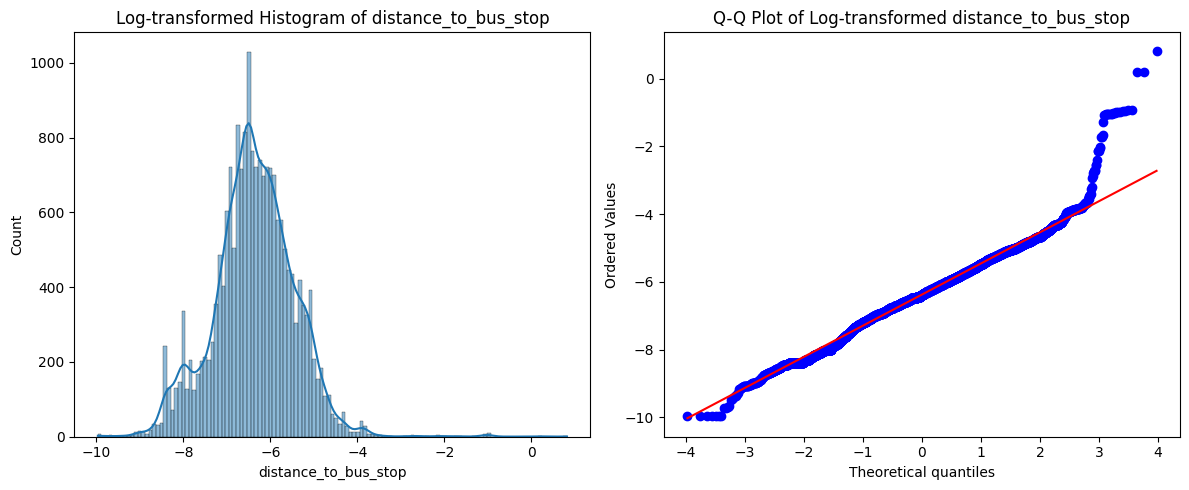

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


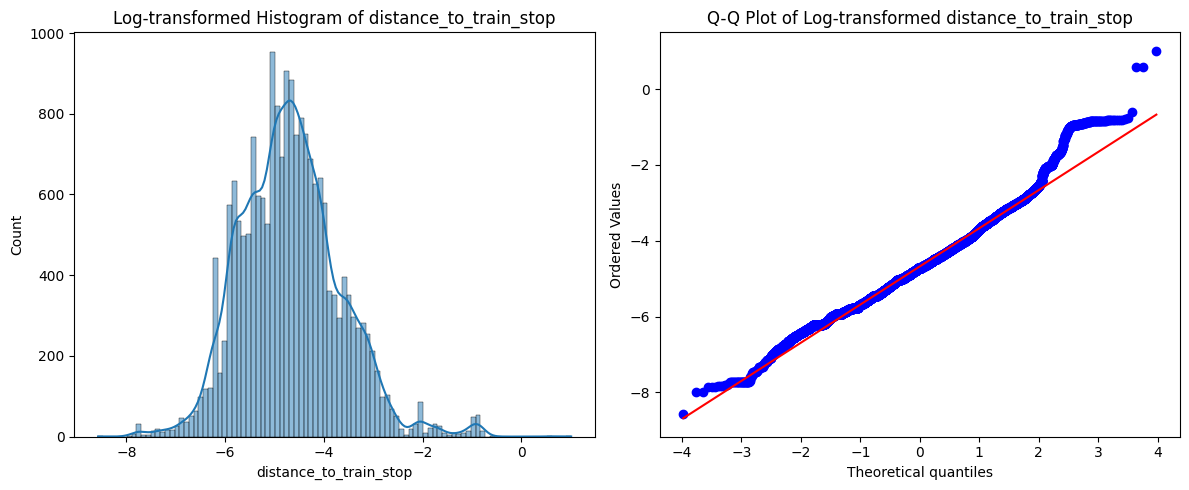

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


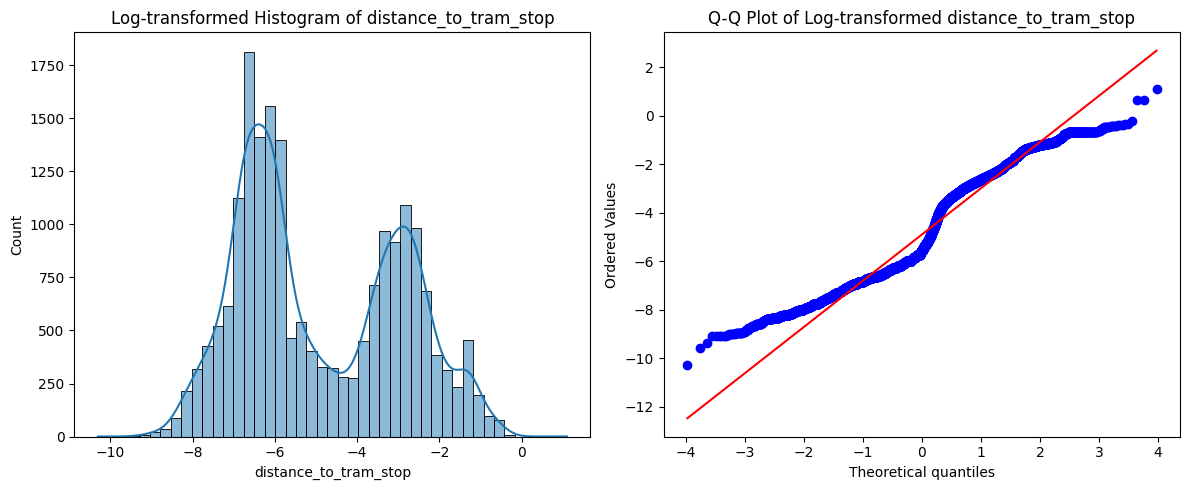

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


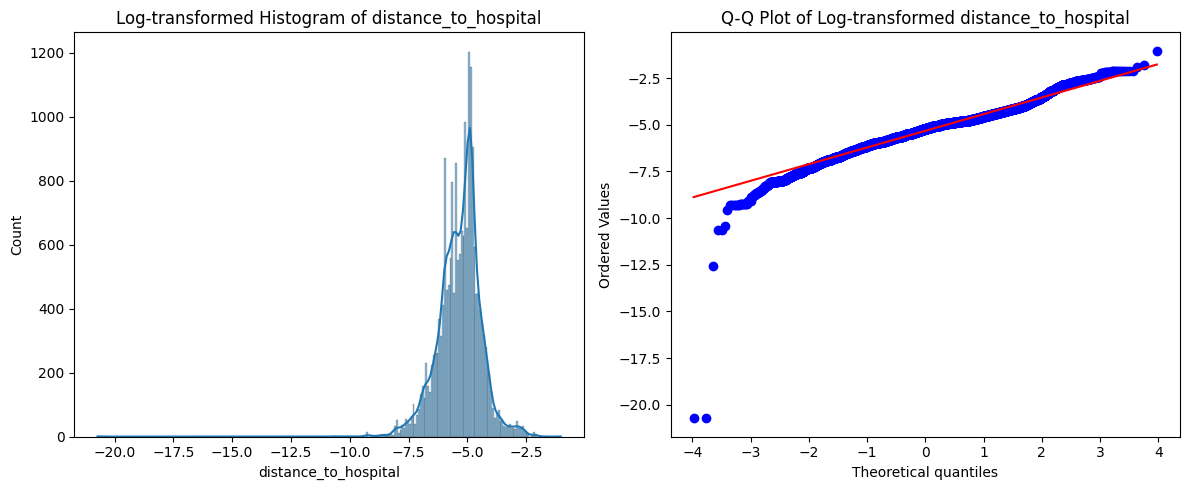

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


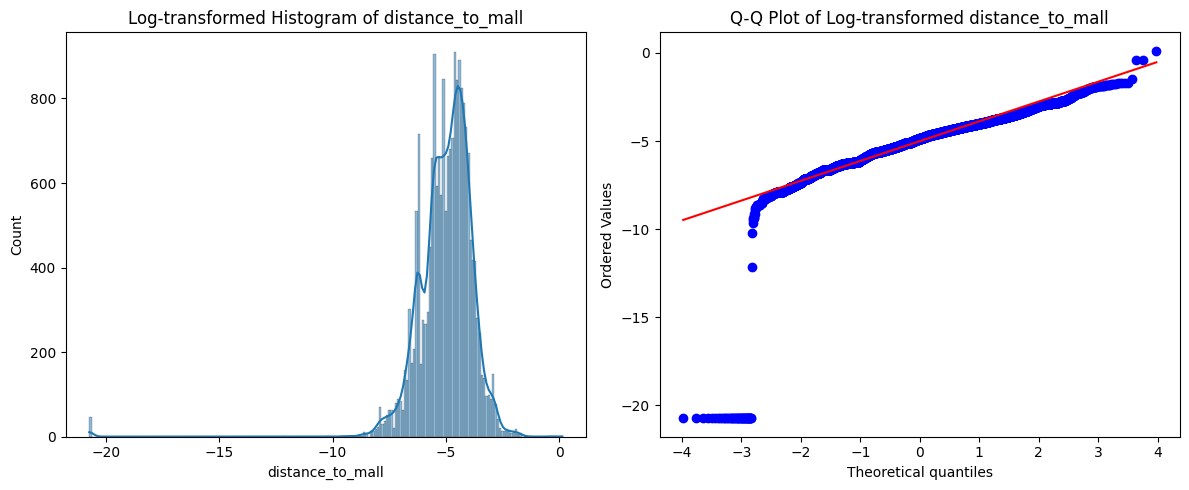

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


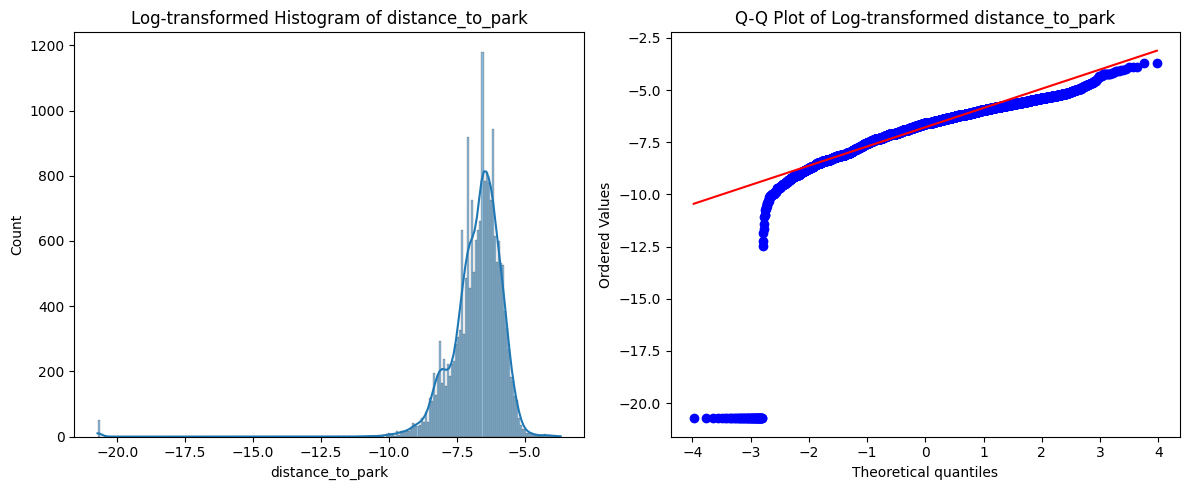

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


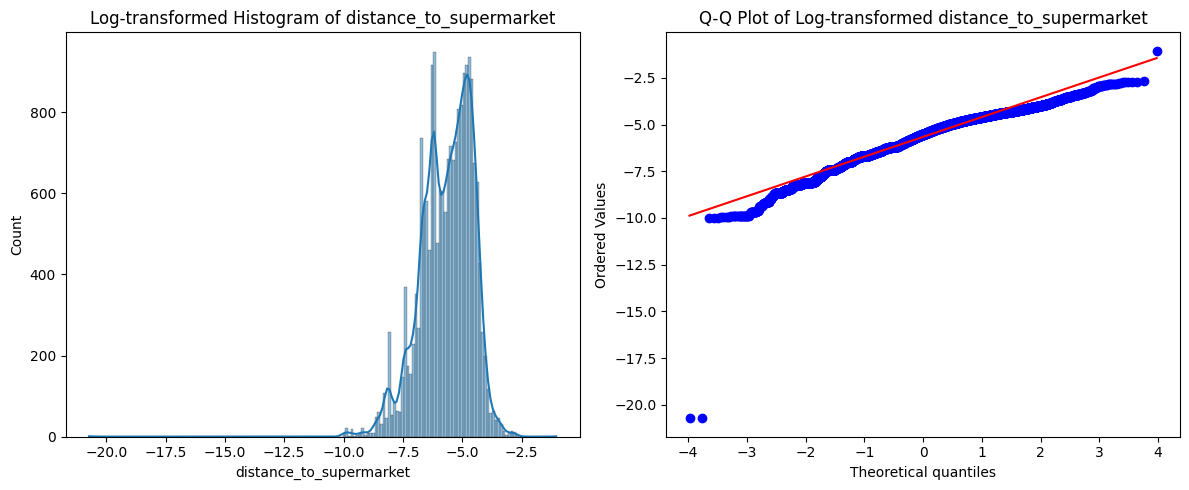

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


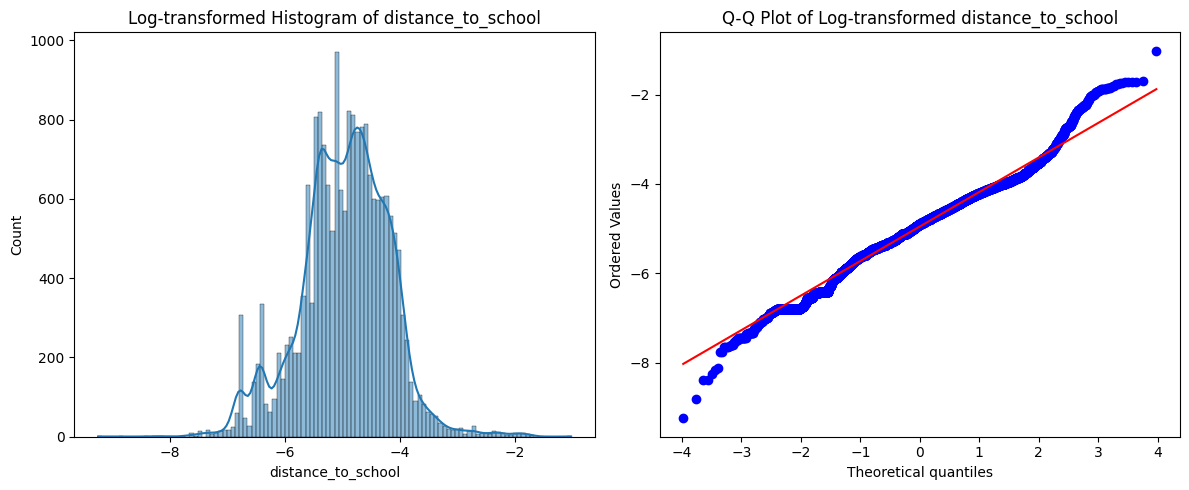

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


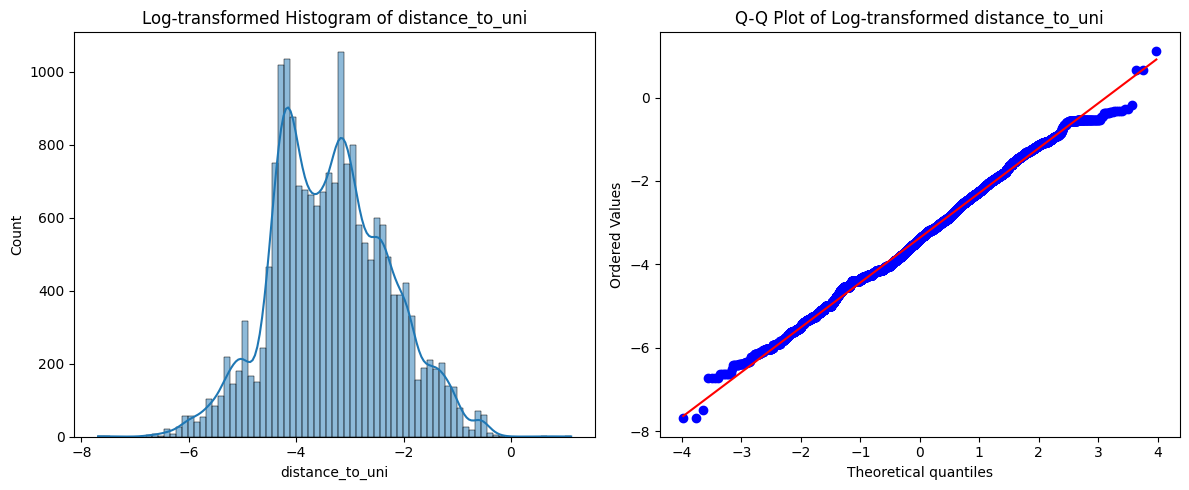

/home/robertus/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19756.
  res = hypotest_fun_out(*samples, **kwds)


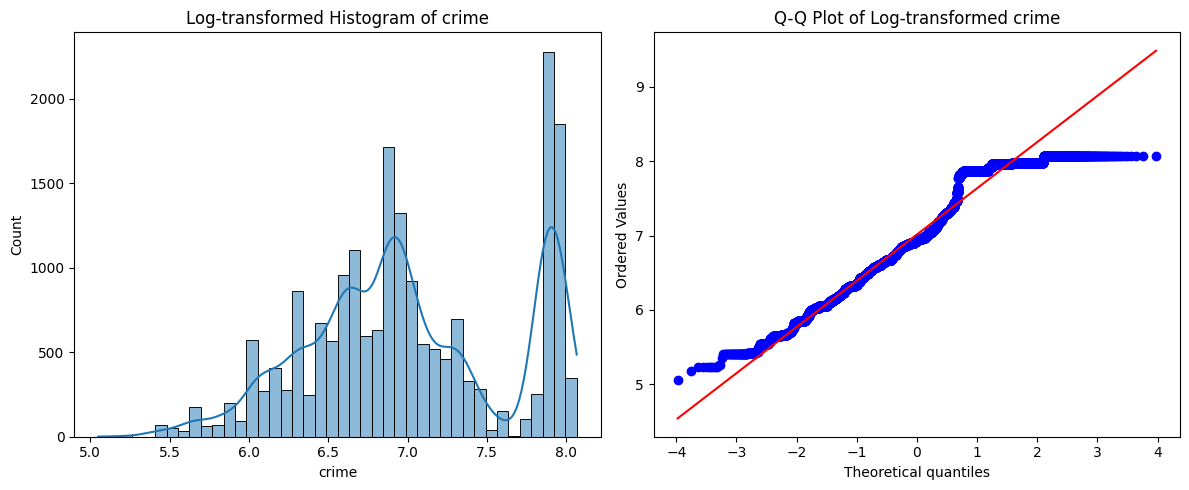


Normality Check Results for Log-Transformed Data:

+---+-------------------------+--------------------+------------------------+---------------------+
|   |         Feature         |    W-statistic     |        p-value         | Normal Distribution |
+---+-------------------------+--------------------+------------------------+---------------------+
| 0 |  distance_to_bus_stop   | 0.985516343458261  | 3.5930898311940416e-40 |        False        |
| 1 | distance_to_train_stop  | 0.9837755677317732 |  5.6404455231474e-42   |        False        |
| 2 |  distance_to_tram_stop  | 0.9386049471903124 | 3.288596388601964e-66  |        False        |
| 3 |  distance_to_hospital   | 0.9625958714107674 | 1.6016348619555992e-56 |        False        |
| 4 |    distance_to_mall     | 0.773025603914988  | 1.490310799211263e-95  |        False        |
| 5 |    distance_to_park     | 0.7062934550319289 | 5.509574509090271e-102 |        False        |
| 6 | distance_to_supermarket | 0.96421406156465

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

# Load your data
df = pd.read_parquet('../data/curated/model_data.parquet')
print("Original DataFrame shape:", df.shape)

# Filter for 2024 and 2023
df = df[(df['year'] == 2024) | (df['year'] == 2023)]
print("Shape after filtering for 2024 and 2023:", df.shape)

# Select features to analyze
features_to_check = [
    'distance_to_bus_stop', 'distance_to_train_stop', 'distance_to_tram_stop',
    'distance_to_hospital', 'distance_to_mall', 'distance_to_park',
    'distance_to_supermarket', 'distance_to_school', 'distance_to_uni', 'crime'
]

# Create a DataFrame for the means and std devs
normality_results = []

# Apply log transformation and check normality for each feature
for col in features_to_check:
    # Avoid log(0) by adding a small constant (1e-9)
    log_col = np.log(df[col].dropna() + 1e-9)
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(log_col)
    normality_results.append({
        'Feature': col,
        'W-statistic': stat,
        'p-value': p_value,
        'Normal Distribution': p_value > 0.05  # True if normal, False otherwise
    })
    
    # Plot histogram and Q-Q plot for the log-transformed data
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(log_col, kde=True)
    plt.title(f'Log-transformed Histogram of {col}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(log_col, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Log-transformed {col}')
    
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
normality_df = pd.DataFrame(normality_results)

# Print normality results
print("\nNormality Check Results for Log-Transformed Data:\n")
print(tabulate(normality_df, headers='keys', tablefmt='pretty', floatfmt=".4f"))

# If the distributions are normal enough, proceed with previous calculations
if all(normality_df['Normal Distribution']):
    # Calculate average distances and other statistics
    sa2_stats = df.groupby('SA2_CODE21').agg({
        'distance_to_bus_stop': 'mean',
        'distance_to_train_stop': 'mean',
        'distance_to_tram_stop': 'mean',
        'distance_to_hospital': 'mean',
        'distance_to_mall': 'mean',
        'distance_to_park': 'mean',
        'distance_to_supermarket': 'mean',
        'distance_to_school': 'mean',
        'distance_to_uni': 'mean',
        'crime': 'mean'
    }).reset_index()
    
    # (Continue with your original analysis...)
else:
    print("\nSome features do not follow a normal distribution after log transformation. Consider using robust statistics or alternative scoring methods.")


Overall, since the features are still not normally distributed, the score for each SA2's features are given by where it ranks relative to other SA2s. This means that SA2s with short distances to different amenities will receive a high score for that specific feature, and then the score for all the features are added up. SA2s with the highest score are deemed to be the most liveable.

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Load your data
df = pd.read_parquet('../data/curated/model_data.parquet')
print("Original DataFrame shape:", df.shape)

# Filter for 2024 and 2023
df = df[(df['year'] == 2024) | (df['year'] == 2023)]
print("Shape after filtering for 2024 and 2023:", df.shape)

# Calculate average distances and other statistics
sa2_stats = df.groupby('SA2_CODE21').agg({
    'distance_to_bus_stop': 'mean',
    'distance_to_train_stop': 'mean',
    'distance_to_tram_stop': 'mean',
    'distance_to_hospital': 'mean',
    'distance_to_mall': 'mean',
    'distance_to_park': 'mean',
    'distance_to_supermarket': 'mean',
    'distance_to_school': 'mean',
    'distance_to_uni': 'mean',
    'crime': 'mean'
}).reset_index()

# Calculate the number of listings for each SA2
listing_counts = df['SA2_CODE21'].value_counts().reset_index()
listing_counts.columns = ['SA2_CODE21', 'number_of_listings']

# Merge listing counts with sa2_stats
sa2_stats = sa2_stats.merge(listing_counts, on='SA2_CODE21', how='left')

# Calculate quantile ranks (reverse to ensure smaller distances get higher scores)
features_to_rank = [
    'distance_to_bus_stop', 'distance_to_train_stop', 'distance_to_tram_stop',
    'distance_to_hospital', 'distance_to_mall', 'distance_to_park',
    'distance_to_supermarket', 'distance_to_school', 'distance_to_uni', 'crime'
]

for col in features_to_rank:
    sa2_stats[f'{col}_quantile'] = 1 - sa2_stats[col].rank(pct=True, ascending=True)

# Create public transport score
sa2_stats['public_transport_score'] = (
    sa2_stats['distance_to_bus_stop_quantile'] +
    sa2_stats['distance_to_train_stop_quantile'] +
    sa2_stats['distance_to_tram_stop_quantile']
) / 3

# Calculate livability score
quantile_columns = [
    'public_transport_score', 'distance_to_hospital_quantile', 'distance_to_mall_quantile',
    'distance_to_park_quantile', 'distance_to_supermarket_quantile',
    'distance_to_school_quantile', 'distance_to_uni_quantile', 'crime_quantile'
]

sa2_stats['livability_score'] = sa2_stats[quantile_columns].sum(axis=1)

# Merge livability score back to original DataFrame
livability_df = sa2_stats
print("SA2 Stats shape:", sa2_stats.shape)

# Load population data
population_df = pd.read_csv('../data/curated/forecasted_populations.csv')
print("Population DataFrame shape:", population_df.shape)

# Ensure 'SA2_CODE21' is numeric
livability_df['SA2_CODE21'] = livability_df['SA2_CODE21'].astype(int)
population_df['SA2_CODE21'] = pd.to_numeric(population_df['Code'], errors='coerce')

# Drop NaN values
population_df = population_df.dropna(subset=['SA2_CODE21'])
print("Population DataFrame shape after dropping NaN:", population_df.shape)

# Check for duplicates
population_df = population_df.drop_duplicates(subset='SA2_CODE21')

# Merge DataFrames
livability_with_suburb = livability_df.merge(
    population_df[['SA2_CODE21', 'Suburb']], 
    on='SA2_CODE21', 
    how='left'
)

# Check sizes
print(f"Number of rows before merge: {len(livability_df)}")
print(f"Number of rows after merge: {len(livability_with_suburb)}")

# Reorder columns to include number of listings and breakdown for scoring
result = livability_with_suburb[['Suburb', 'SA2_CODE21', 'livability_score', 'number_of_listings'] +
                                  features_to_rank + 
                                  [f'{col}_quantile' for col in features_to_rank]]

# Sort and take top 30
result = result.sort_values(by='livability_score', ascending=False)

# Print the result using tabulate
print("\nTop SA2 Areas by Livability Score with Breakdown:\n")
print(tabulate(result, headers='keys', tablefmt='pretty', floatfmt=".2f"))


Original DataFrame shape: (120526, 26)
Shape after filtering for 2024 and 2023: (19756, 26)
SA2 Stats shape: (345, 24)
Population DataFrame shape: (608, 8)
Population DataFrame shape after dropping NaN: (606, 9)
Number of rows before merge: 345
Number of rows after merge: 345

Top SA2 Areas by Livability Score with Breakdown:

+-----+-----------------------------------------------+------------+---------------------+--------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+------------------------+-------------------------+-----------------------+----------------------+--------------------+-------------------------------+---------------------------------+--------------------------------+-------------------------------+---------------------------+---------------------------+----------------------------------+-----------------------------+--------------------------+-----------------------+
|     |         

We selected only SA2s with more than 50 listings so that our analysis is accurate

In [3]:
# Save to CSV: Filtered by property count > 50
filtered_df = result[result['number_of_listings'] > 50]
filtered_df.to_csv('../data/curated/sa2_livability_filtered.csv', index=False)

# Print the result using tabulate
print("\nTop SA2 Areas by Livability Score with Breakdown:\n")
print(tabulate(filtered_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))

print("\nFiltered DataFrame with more than 50 property counts saved to '../data/curated/sa2_livability_filtered.csv'.")


Top SA2 Areas by Livability Score with Breakdown:

+-----+-----------------------------------------------+------------+---------------------+--------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-------------------------+-----------------------+----------------------+--------------------+-------------------------------+---------------------------------+--------------------------------+-------------------------------+---------------------------+---------------------------+----------------------------------+-----------------------------+--------------------------+-----------------------+
|     |                    Suburb                     | SA2_CODE21 |  livability_score   | number_of_listings | distance_to_bus_stop  | distance_to_train_stop | distance_to_tram_stop | distance_to_hospital  |   distance_to_mall    |   distance_to_park    | distance_to_supermarket |  distance_t